# Adapted from CS109a Introduction to Data Science

slides are available [here](https://docs.google.com/presentation/d/1J9bVXwojmeds6B8l22uuxNz4XPzcyS-xBI8FFR5lnIk/edit?usp=sharing)

## Seminar 5, Exercise 1: Best Degree of Polynomial with Train and Validation sets

## Description :
The aim of this exercise is to find the **best degree** of polynomial based on the MSE values. Further, plot the train and validation error graphs as a function of degree of the polynomial as shown below.

## Data Description:

## Instructions:

- Read the dataset and split into train and validation sets.
- Select a max degree value for the polynomial model.
- Fit a polynomial regression model on the training data for each degree and predict on the validation data.
- Compute the train and validation error as MSE values and store in separate lists.
- Find out the best degree of the model.
- Plot the train and validation errors for each degree.

## Hints: 

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html" target="_blank">pd.read_csv(filename)</a>
Returns a pandas dataframe containing the data and labels from the file data

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" target="_blank">sklearn.train_test_split()</a>
Splits the data into random train and test subsets

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html" target="_blank">sklearn.PolynomialFeatures()</a>
Generates a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures.fit_transform" target="_blank">sklearn.fit_transform()</a>
Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" target="_blank">sklearn.LinearRegression(fit_intercept=False)</a>
LinearRegression fits a linear model with no intercept calculation

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit" target="_blank">sklearn.fit()</a>
Fits the linear model to the training data

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict" target="_blank">sklearn.predict()</a>
Predict using the linear model

<a href="https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplots.html" target="_blank">plt.subplots()</a>
Create a figure and a set of subplots

In [1]:
# Import necessary libraries
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,9)

### Reading the dataset

https://www.kaggle.com/datasets/aungpyaeap/fish-market

This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be performed using machine friendly data and estimate the weight of fish can be predicted.

In [2]:
# Read the file "Fish.csv" as a Pandas dataframe
df = pd.read_csv("Fish.csv")

# Take a quick look at the dataset
df.head()


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
# Assign the values of the Weight and other columns values to the
# predictor and response variables
y = df.drop(['Weight', 'Species'], axis = 1).values
x = df[['Weight']].values


### Train-validation split

In [14]:
# Split the dataset into train and validation sets with 80% training set
# Set random_state=1
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.8, random_state=0)


### Computing the train and validation error in terms of MSE

In [18]:
# To iterate over the range, select the maximum degree of the polynomial
maxdeg = 20

# Create two empty lists to store training and validation MSEs
training_error, validation_error = [],[]

# Loop through the degrees of the polynomial to create different models
for d in range(maxdeg):
    
    # Compute the polynomial features for the current degree 
    # for the train set
    x_poly_train = PolynomialFeatures(degree = d).fit_transform(x_train)

    # Compute the polynomial features for the validation set
    x_poly_val = PolynomialFeatures(degree = d).fit_transform(x_val)
    
    # Initialize a linear regression model
    lreg = LinearRegression(fit_intercept=False)

    # Fit the model on the train data
    lreg.fit(x_poly_train, y_train)
    
    # Use the trained model to predict on the transformed train data
    y_train_pred = lreg.predict(x_poly_train)

    # Use the trained model to predict on the transformed validation data
    y_val_pred = lreg.predict(x_poly_val)
    
    # Compute the MSE on the train predictions
    training_error.append(mean_squared_error(y_train, y_train_pred))

    # Compute the MSE on the validation predictions
    validation_error.append(mean_squared_error(y_val, y_val_pred))
    

### Finding the best degree

In [20]:
# Helper code to compute the best degree, which is the model
# with the lowest validation error
min_mse = min(validation_error)
best_degree = validation_error.index(min_mse)

# Print the degree of the best model computed above
print("The best degree of the model is",best_degree)


The best degree of the model is 5


### Plotting the error graph

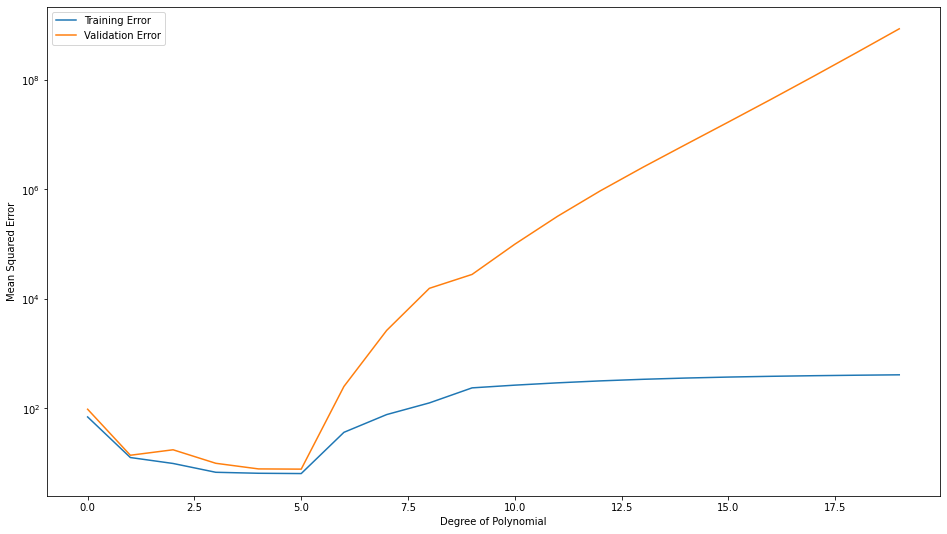

In [21]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)

# Plot the errors as a function of increasing d value to visualise the training
# and testing errors
fig, ax = plt.subplots()

# Plot the training error with labels
ax.plot(np.arange(0, maxdeg), training_error, label="Training Error")

# Plot the validation error with labels
ax.plot(np.arange(0, maxdeg), validation_error, label="Validation Error")

# Set the plot labels and legends
ax.set_xlabel('Degree of Polynomial')
ax.set_ylabel('Mean Squared Error')
ax.legend(loc = 'best')
ax.set_yscale('log')
plt.show();


#### ⏸ If you run the exercise with a random state of 0, do you notice any change? What would you attribute this change to?

# Cross-validation

## Seminar 5, Exercise 2: Best Degree of Polynomial using Cross-validation

## Description :
The aim of this exercise is to find the **best degree** of polynomial based on the MSE values. Further, plot the train and cross-validation error graphs as shown below.


## Data Description:

## Instructions:

- Read the dataset and split into train and validation sets.
- Select a max degree value for the polynomial model.
- For each degree:
    - Perform k-fold cross validation
    - Fit a polynomial regression model for each degree on the training data and predict on the validation data
- Compute the train, validation and cross-validation error as MSE values and store them in separate lists.
- Print the best degree of the model for both validation and cross-validation approaches.
- Plot the train and cross-validation errors for each degree.

## Hints:

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html" target="_blank"></a>pd.read_csv(filename)</a>
Returns a pandas dataframe containing the data and labels from the file data.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" target="_blank">sklearn.train_test_split()</a>
Splits the data into random train and test subsets.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html" target="_blank">sklearn.PolynomialFeatures()</a>
Generates a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html" target="_blank">sklearn.cross_validate()</a>
Evaluate metric(s) by cross-validation and also record fit/score times.

<img src="../fig/fig2.png" style="width: 500px;">


<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html" target="_blank">sklearn.fit_transform()</a>
Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" target="_blank">sklearn.LinearRegression(fit_intercept=False)</a>
LinearRegression fits a linear model.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit" target="_blank">sklearn.fit()</a>
Fits the linear model to the training data.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict" target="_blank">sklearn.predict()</a>
Predict using the linear model.

<a href="https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplots.html" target="_blank">plt.subplots()</a>
Create a figure and a set of subplots.

<a href="https://docs.python.org/3/library/operator.html" target="_blank">operator.itemgetter()</a>
Return a callable object that fetches item from its operand.

<a href="https://docs.python.org/3.3/library/functions.html#zip" target="_blank">zip()</a>
Makes an iterator that aggregates elements from each of the iterables.

In [36]:
# Read the file "Fish.csv" as a Pandas dataframe
df = pd.read_csv("Fish.csv")

# Take a quick look at the dataset
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
# Assign the values of the Weight and other columns values to the
# predictor and response variables
y = df.drop(['Weight', 'Species'], axis = 1).values
x = df[['Weight']].values

### Computing the MSE

In [ ]:
# To iterate over the range, select the maximum degree of the polynomial
maxdeg = 10

# Create three empty lists to store training, validation and cross-validation MSEs
training_error, validation_error, cross_validation_error = [],[],[]

# Loop through the degrees of the polynomial
for d in range(___):

    # Compute the polynomial features for the entire data
    x_poly = PolynomialFeatures(___).fit_transform(___)

    # Compute the polynomial features for the train data
    x_poly_train = PolynomialFeatures(___).fit_transform(___)

    # Compute the polynomial features for the validation data
    x_poly_val = PolynomialFeatures(___).fit_transform(___)

    # Initialize a Linear Regression object
    lreg = LinearRegression()

    # Fit model on the training set
    lreg.fit(___)

    # Predict on the training data
    y_train_pred = lreg.predict(___)

    # Predict on the validation set
    y_val_pred = lreg.predict(___)

    # Compute the mse on the train data
    training_error.append(mean_squared_error(___))

    # Compute the mse on the validation data
    validation_error.append(mean_squared_error(___))

    # Perform cross-validation on the entire data with 10 folds and
    # get the mse_scores
    mse_score = cross_validate(___)

    # Compute the mean of the cross validation error and store in list
    # Remember to take into account the sign of the MSE metric returned by the cross_validate function
    cross_validation_error.append(___)

### Finding the best degree

In [ ]:
### edTest(test_best_degree) ###

# Get the best degree associated with the lowest validation error
min_mse = min(___)
best_degree = validation_error.index(___)


# Get the best degree associated with the lowest cross-validation error
min_cross_val_mse = min(___)
best_cross_val_degree = cross_validation_error.index(___)

# Print the values
print("The best degree of the model using validation is",best_degree)
print("The best degree of the model using cross-validation is",best_cross_val_degree)


### Plotting the error graph

In [ ]:
# Plot the errors as a function of increasing d value to visualise the training and validation errors
fig, ax = plt.subplots(1,2, figsize=(16,8))

# Plot the training error with labels
ax[0].plot(range(maxdeg), np.log(training_error), label = 'Training error', linewidth=3, color='#FF7E79', alpha=0.4)

# Plot the validation error with labels
ax[0].plot(range(maxdeg), np.log(validation_error), label = 'Validation error', linewidth=3, color="#007D66", alpha=0.4)

# Plot the training error with labels
ax[1].plot(range(maxdeg), np.log(training_error), label = 'Training error', linewidth=3, color='#FF7E79', alpha=0.4)

# Plot the cross-validation error with labels
ax[1].plot(range(maxdeg), np.log(cross_validation_error), label = 'Cross-Validation error', linewidth=3, color="#007D66", alpha=0.4)

# Set the plot labels and legends
ax[0].set_xlabel('Degree of Polynomial', fontsize=12)
ax[0].set_ylabel('Log Mean Squared Error', fontsize=12)
ax[0].set_title("Log of validation error as a function of degree")

ax[1].set_xlabel('Degree of Polynomial', fontsize=12)
ax[1].set_ylabel('Log Mean Squared Error', fontsize=12)
ax[1].set_title("Log of CV error as a function of degree")

ax[0].legend()
ax[1].legend()
plt.show();


⏸ If you run the exercise with a random state of 0, do you notice any change? What conclusion can you draw from this experiment?

## Exercise 3: Bias Variance Tradeoff## Instructions:

- Read the file `noisypopulation.csv` as a Pandas dataframe.
- Assign the response and predictor variables appropriately as mentioned in the scaffold.
- Perform sampling on the dataset to get a subset.
- For each sampled version fo the dataset:
    - For degree of the chosen degree value:
        - Compute the polynomial features for the training
        - Fit the model on the given data
        - Select a set of random points in the data to predict the model
        - Store the predicted values as a list
- Plot the predicted values along with the random data points and true function as given above.


## Hints:

FUNCTION SIGNATURE:
gen(degree, number of samples, number of points, x, y)

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html" target="_blank">sklearn.PolynomialFeatures()</a>
Generates polynomial and interaction features

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" target="_blank">sklearn.LinearRegression()</a>
LinearRegression fits a linear model

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit" target="_blank">sklearn.fit()</a>
Fits the linear model to the training data

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict" target="_blank">sklearn.predict()</a>
Predict using the linear model.

In [119]:
# from sklearn.datasets import load_diabetes
# df = load_diabetes()

In [38]:
df = pd.read_csv("noisypopulation.csv")

In [39]:
# Helper function to define plot characteristics
def make_plot():
    fig, axes=plt.subplots(figsize=(20,8), nrows=1, ncols=2);
    axes[0].set_ylabel("$p_R$", fontsize=18)
    axes[0].set_xlabel("$x$", fontsize=18)
    axes[1].set_xlabel("$x$", fontsize=18)
    axes[1].set_yticklabels([])
    axes[0].set_ylim([0,1])
    axes[1].set_ylim([0,1])
    axes[0].set_xlim([0,1])
    axes[1].set_xlim([0,1])
    plt.tight_layout();
    return axes

In [40]:
# Set column x is the predictor and column y is the response variable.
# Column f is the true function of the given data
# Select the values of the columns

x = df.
f = df.
y = df.

In [ ]:
# Function to compute the Polynomial Features for the data x
# for the given degree d
def polyshape(d, x):
    return PolynomialFeatures(___).fit_transform(___.reshape(-1,1))

In [ ]:
# Function to fit a Linear Regression model
def make_predict_with_model(x, y, x_pred):

    # Create a Linear Regression model with fit_intercept as False
    lreg = ___

    # Fit the model to the data x and y got parameters to the function
    lreg.fit(___, ___)

    # Predict on the x_pred data got as a parameter to this function
    y_pred = lreg.predict(___)

    # Return the linear model and the prediction on the test data
    return lreg, y_pred


In [ ]:
# Function to perform sampling and fit the data, with the following parameters

# degree is the maximum degree of the model
# num_sample is the number of samples
# size is the number of random points selected from the data for each sample
# x is the predictor variable
# y is the response variable

def gen(degree, num_sample, size, x, y):

    # Create 2 lists to store the prediction and model
    predicted_values, linear_models =[], []

    # Loop over the number of samples
    for i in range(num_sample):

        # Helper code to call the make_predict_with_model function to fit on the data
        indexes=np.sort(np.random.choice(x.shape[0], size=size, replace=False))

        # lreg and y_pred hold the model and predicted values for the current sample
        lreg, y_pred = make_predict_with_model(polyshape(degree, x[indexes]), y[indexes], polyshape(degree, x))

        # Append the model and predicted values to the appropriate lists
        predicted_values.append(___)
        linear_models.append(___)

    # Return the 2 lists, one for predicted values and one for the model
    return predicted_values, linear_models


In [ ]:
# Call the function gen() twice with x and y as the
# predictor and response variable respectively

# Set the number of samples to 200 and the number of points as 30
# Store the return values in appropriate variables

# Get results for degree 1
predicted_1, model_1 = gen(___);

# Get results for degree 100
predicted_100, model_100 = gen(___);


In [ ]:
# Helper code to plot the data
indexes = np.sort(np.random.choice(x.shape[0], size=30, replace=False))

plt.figure(figsize = (12,8))
axes=make_plot()

# Plot for Degree 1
axes[0].plot(x,f,label="f", color='darkblue',linewidth=4)
axes[0].plot(x, y, '.', label="Population y", color='#009193',markersize=8)
axes[0].plot(x[indexes], y[indexes], 's', color='black', label="Data y")

for i,p in enumerate(predicted_1[:-1]):
    axes[0].plot(x,p,alpha=0.03,color='#FF9300')
axes[0].plot(x, predicted_1[-1], alpha=0.3,color='#FF9300',label="Degree 1 from different samples")


# Plot for Degree 100
axes[1].plot(x,f,label="f", color='darkblue',linewidth=4)
axes[1].plot(x, y, '.', label="Population y", color='#009193',markersize=8)
axes[1].plot(x[indexes], y[indexes], 's', color='black', label="Data y")


for i,p in enumerate(predicted_100[:-1]):
    axes[1].plot(x,p,alpha=0.03,color='#FF9300')
axes[1].plot(x,predicted_100[-1],alpha=0.2,color='#FF9300',label="Degree 100 from different samples")

axes[0].legend(loc='best')
axes[1].legend(loc='best')

plt.show();


#### ⏸ Does changing the degree from 100 to 10 reduce variance? Why or why not?


In [ ]:
# Submit an answer choice as a string below
answer1 = '___'
